<a href="https://colab.research.google.com/github/adityaas05/Portofolio/blob/main/Marketing%20Analysis/Ads%20CTR%20Forecasting/EDA_BCG_Data_Scientist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set(color_codes=True)

In [ ]:
client_df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vT_etmLurjPMCu-rR2P2YsPpaaemqnI4Ro7ccSWwBYqc5HDpqB1sEPMoOqhLaAVzQ/pub?output=csv')
price_df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRV_Ji-Oybzv0ktAL3-I3r67aIQBKLCAiMebHIrBOPpIfAbZMmjDoCETOE9gJ693g/pub?output=csv')

In [ ]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,0,...,t,0,"25,44","25,44",2,"678,99",3,lxidpiddsbxsbosboudacockeimpuepw,"43,648",1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,8/21/2009,8/30/2016,8/21/2009,8/31/2015,"189,95",...,f,0,"16,38","16,38",1,"18,89",6,kamkkxfxxuwbdslkwifmmcsiusiuosws,"13,8",0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,4/16/2010,4/16/2016,4/16/2010,4/17/2015,"47,96",...,f,0,"28,6","28,6",1,"6,6",6,kamkkxfxxuwbdslkwifmmcsiusiuosws,"13,856",0


In [ ]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,1/1/2015,"0,151367",0,0,"44,26693116",0,0
1,038af19179925da21a25619c5a24b745,2/1/2015,"0,151367",0,0,"44,26693116",0,0
2,038af19179925da21a25619c5a24b745,3/1/2015,"0,151367",0,0,"44,26693116",0,0


# EDA


In [ ]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              14606 non-null  object
 1   channel_sales                   14606 non-null  object
 2   cons_12m                        14606 non-null  int64 
 3   cons_gas_12m                    14606 non-null  int64 
 4   cons_last_month                 14606 non-null  int64 
 5   date_activ                      14606 non-null  object
 6   date_end                        14606 non-null  object
 7   date_modif_prod                 14606 non-null  object
 8   date_renewal                    14606 non-null  object
 9   forecast_cons_12m               14606 non-null  object
 10  forecast_cons_year              14606 non-null  int64 
 11  forecast_discount_energy        14606 non-null  int64 
 12  forecast_meter_rent_12m         14606 non-null

In [ ]:
client_df['forecast_cons_12m'] = client_df['forecast_cons_12m'].astype(str).str.replace('[^\d.,]', '', regex=True)
client_df['forecast_meter_rent_12m'] = client_df['forecast_meter_rent_12m'].astype(str).str.replace('[^\d.,]', '', regex=True)
client_df['forecast_price_energy_off_peak'] = client_df['forecast_price_energy_off_peak'].astype(str).str.replace('[^\d.,]', '', regex=True)
client_df['forecast_price_energy_peak'] = client_df['forecast_price_energy_peak'].astype(str).str.replace('[^\d.,]', '', regex=True)
client_df['forecast_price_pow_off_peak'] = client_df['forecast_price_pow_off_peak'].astype(str).str.replace('[^\d.,]', '', regex=True)
client_df['imp_cons'] = client_df['imp_cons'].astype(str).str.replace('[^\d.,]', '', regex=True)
client_df['margin_gross_pow_ele'] = client_df['margin_gross_pow_ele'].astype(str).str.replace('[^\d.,]', '', regex=True)
client_df['margin_net_pow_ele'] = client_df['margin_net_pow_ele'].astype(str).str.replace('[^\d.,]', '', regex=True)
client_df['net_margin'] = client_df['net_margin'].astype(str).str.replace('[^\d.,]', '', regex=True)
client_df['pow_max'] = client_df['pow_max'].astype(str).str.replace('[^\d.,]', '', regex=True)

In [ ]:
columns_to_convert = ['forecast_cons_12m', 'forecast_meter_rent_12m',
                      'forecast_price_energy_off_peak', 'forecast_price_energy_peak',
                      'forecast_price_pow_off_peak', 'imp_cons', 'margin_gross_pow_ele',
                      'margin_net_pow_ele', 'net_margin', 'pow_max']
for col in columns_to_convert:
    client_df[col] = client_df[col].str.replace(',', '.').astype(float)

In [ ]:
client_df['churn'] = client_df['churn'].astype(int)

In [ ]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  int64  
 12  forecast_meter_rent_12m         

In [ ]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  193002 non-null  object
 1   price_date          193002 non-null  object
 2   price_off_peak_var  193002 non-null  object
 3   price_peak_var      193002 non-null  object
 4   price_mid_peak_var  193002 non-null  object
 5   price_off_peak_fix  193002 non-null  object
 6   price_peak_fix      193002 non-null  object
 7   price_mid_peak_fix  193002 non-null  object
dtypes: object(8)
memory usage: 11.8+ MB


In [ ]:
columns_to_convert = ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
                      'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']
for col in columns_to_convert:
    price_df[col] = price_df[col].str.replace(',', '.').astype(float)

In [ ]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


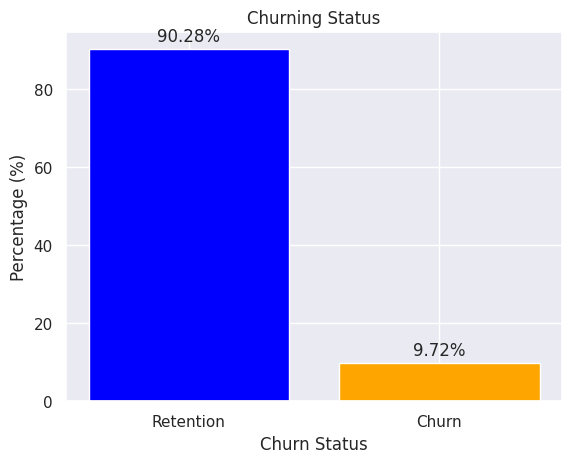

In [ ]:
churn_counts = client_df['churn'].value_counts()
churn_percentages = (churn_counts / churn_counts.sum()) * 100
bars = plt.bar(churn_percentages.index, churn_percentages.values, color=['blue', 'orange'])
plt.xlabel('Churn Status')
plt.ylabel('Percentage (%)')
plt.title('Churning Status')
for bar, percentage in zip(bars, churn_percentages.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
             f'{percentage:.2f}%', ha='center', va='bottom')
plt.xticks(churn_percentages.index, labels=['Retention', 'Churn'])
plt.show()

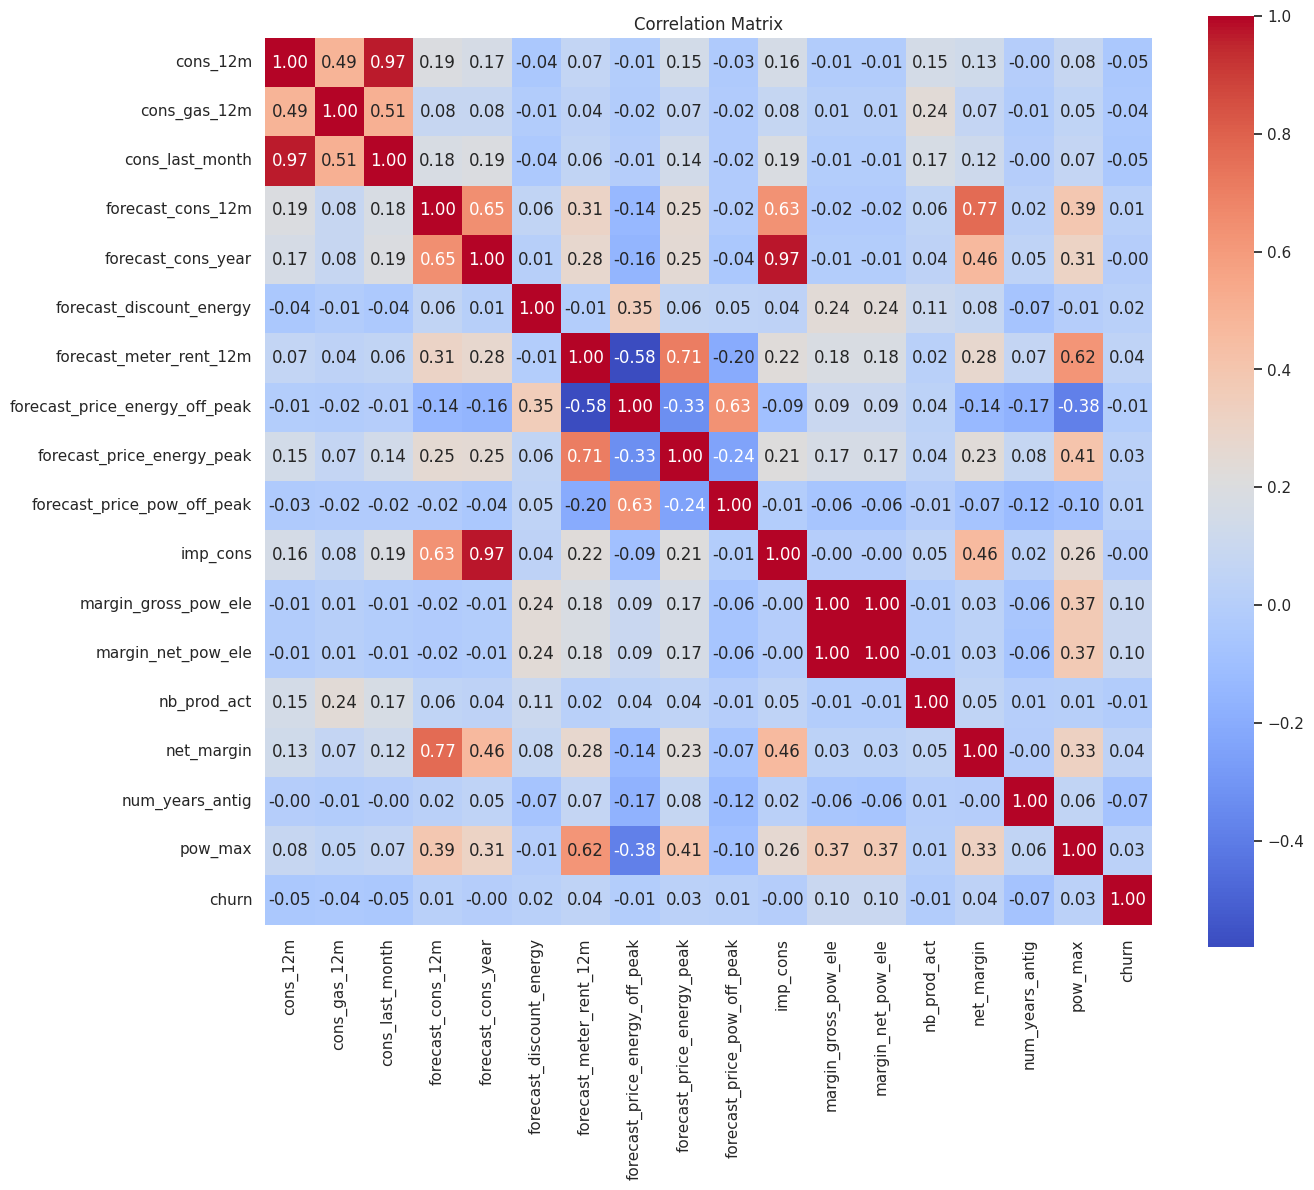

In [ ]:
numeric_columns = client_df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_columns.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

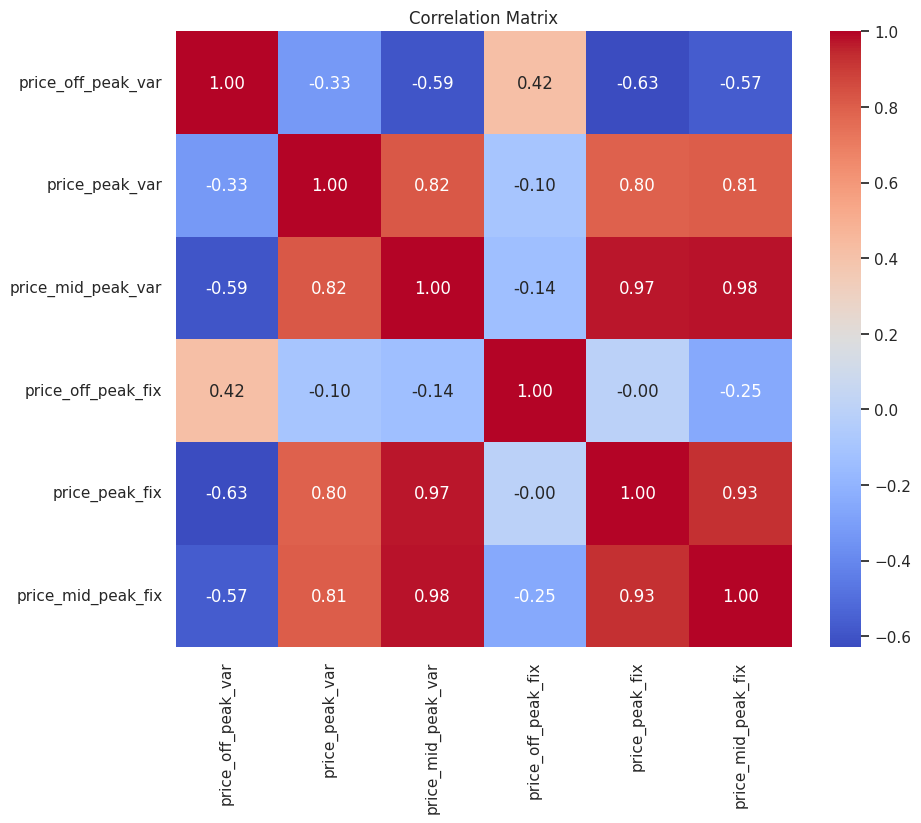

In [ ]:
numeric_columns = price_df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.show()